In [1]:
import os,sys
import pandas as pd
from sklearn.model_selection import train_test_split
import scipy.io
import numpy as np 
from scipy.spatial.distance import pdist
import time 
import math
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import keras
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential

Using TensorFlow backend.


In [2]:
root = sys.path[0]
train_dir =  os.path.join(root,  '../data/train_set')  
train_image_dir =  os.path.join(train_dir, 'images')
train_pt_dir =  os.path.join(train_dir, 'points' )
train_label_path =  os.path.join(train_dir,  "label.csv")

In [3]:
train_dir

'C:\\Users\\ariaa\\Desktop\\Columbia Winter 2020\\5243\\Spring2020-Project3-ads-spring2020-project3-group1\\doc\\../data/train_set'

In [4]:
info = pd.read_csv(train_label_path)
train_idx, test_idx = train_test_split(info['Index'], test_size=0.25, random_state=42)

# read mat file and store coordinates in mat 
m = []
for idx in info['Index']: 
    file = "%04d.mat"%(idx)
    m.append( scipy.io.loadmat( os.path.join( train_pt_dir, file ) ))

mat = [x[[i for i in x.keys() if not i in ['__header__', '__version__', '__globals__']][0]] for x in m]

In [5]:
c = np.array([pdist(x) for x in mat[0:]])


In [6]:

train_features, test_features, train_labels, test_labels = train_test_split(c, info.emotion_idx, test_size = 0.25, random_state = 42)

In [7]:


train_mat = [ mat[i-1] for i in train_idx ] 
test_mat = [ mat[i-1] for i in test_idx ]
train_labels = info.emotion_idx[train_idx-1]
test_labels = info.emotion_idx[test_idx-1]



In [8]:
train_label_cat = to_categorical(train_labels)
train_label_cat= train_label_cat[:,1:]
test_label_cat = to_categorical(test_labels)
test_label_cat= test_label_cat[:,1:]

Y_train = np.argmax(train_label_cat, axis=1)
Y_test=np.argmax(test_label_cat, axis=1)

In [9]:
from scipy.spatial.distance import pdist
import numpy as np

In [49]:
#decision tree
leaf_nodes = [10, 20,30,50,70,100]
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# 2. using distances
dt_distances_accuracies = []
for leaf_n in leaf_nodes:
    model = DecisionTreeClassifier(max_leaf_nodes= leaf_n)
    
    dt_distances_acc = cross_val_score(model, train_features, train_label_cat, cv=5,scoring="accuracy")
    print(f"Average with leaf={leaf_n}: ", dt_distances_acc)
    dt_distances_accuracies.append(dt_distances_acc)

Average with leaf=10:  [0.056      0.07733333 0.048      0.088      0.06666667]
Average with leaf=20:  [0.12       0.14133333 0.12533333 0.12266667 0.112     ]
Average with leaf=30:  [0.17866667 0.16266667 0.17866667 0.152      0.15733333]
Average with leaf=50:  [0.208      0.21333333 0.21066667 0.2        0.192     ]
Average with leaf=70:  [0.23733333 0.24266667 0.232      0.224      0.21333333]
Average with leaf=100:  [0.24266667 0.248      0.25333333 0.248      0.26133333]


In [10]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, make_scorer
from statistics import mean
import time

In [53]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV


param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf =RandomForestClassifier(n_estimators=100)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(train_features, train_labels)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.9min finished
C:\Users\ariaa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [54]:
#print("best learning rate: {}".format(grid_search.best_params_['learning_rate']))
print("accuracy: {}".format(grid_search.best_score_))

accuracy: 0.3472


In [11]:
from xgboost.sklearn import XGBClassifier

In [12]:
train_labels_xgb = [ x  - 1 for x in train_labels ] 
test_labels_xgb= [ x  - 1 for x in test_labels ]

In [61]:
#XGB
xgb = XGBClassifier(
 learning_rate =0.1,
 n_estimators= 200,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',  # for multi-labels classification 
 num_class = 22, 
 scale_pos_weight=1,
 seed=123)
start_time=time.time()
xgb.fit(train_features, train_labels_xgb ,eval_metric='auc')
print("training  model takes %s seconds" % round((time.time() - start_time),3))

training  model takes 249.093 seconds


In [62]:
start_time = time.time()
pred_xgb = xgb.predict(test_features)
print("testing model takes %s seconds" % round((time.time() - start_time),3))

testing model takes 0.126 seconds


In [63]:
acc_xgb = accuracy_score(pred_xgb,test_labels_xgb )
print("Test accuracy is %s percent" %(acc_xgb*100))

Test accuracy is 50.56 percent


## 开始baseline 初始0.438 调参

In [23]:
#baseline GBM
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(train_features, train_labels)
predictors=list(train_features)


print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(test_features,test_labels)))
pred=baseline.predict(test_features)
print(classification_report(test_labels, pred))

Accuracy of the GBM on test set: 0.438
              precision    recall  f1-score   support

           1       0.42      0.50      0.45        20
           2       0.79      0.71      0.75        31
           3       0.56      0.53      0.54        38
           4       0.52      0.50      0.51        32
           5       0.78      0.64      0.71        28
           6       0.53      0.68      0.60        25
           7       0.33      0.29      0.31        24
           8       0.64      0.69      0.67        26
           9       0.60      0.48      0.53        25
          10       0.55      0.32      0.41        34
          11       0.35      0.47      0.40        19
          12       0.33      0.26      0.30        34
          13       0.26      0.32      0.29        28
          14       0.64      0.51      0.57        35
          15       0.39      0.43      0.41        21
          16       0.61      0.67      0.64        21
          17       0.36      0.35      0.3

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [77]:
#parameter tuning
p_test3 = {'learning_rate':[0.1,0.05], 'n_estimators':[50,100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
                param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(train_features,train_labels)
tuning.cv_results_, tuning.best_params_, tuning.best_score_



({'mean_fit_time': array([ 15.40715823,  29.28902969,  49.3944324 ,  53.11507711,
          55.18816986,  59.12221122,  61.25709095,  64.76929288,
          67.08024154,  14.92883058,  29.83723369,  71.5798696 ,
          99.23926091, 102.55658336, 105.28049517, 107.4824029 ,
         111.50146308, 111.21266351]),
  'std_fit_time': array([0.17391099, 0.19572229, 0.69058842, 1.09710315, 0.39118344,
         0.51806917, 0.888164  , 0.8851804 , 0.87036257, 0.16340271,
         0.21745172, 0.2978652 , 1.01106934, 1.54087285, 0.79941837,
         0.99481422, 2.61529059, 4.92342539]),
  'mean_score_time': array([0.01815162, 0.03510671, 0.04468083, 0.0594408 , 0.06123633,
         0.06302385, 0.06722059, 0.07380252, 0.09155502, 0.01875072,
         0.03091779, 0.06203451, 0.09354968, 0.09195414, 0.09833708,
         0.10930796, 0.12526441, 0.1120997 ]),
  'std_score_time': array([0.00159578, 0.00801353, 0.0023083 , 0.0121594 , 0.00559242,
         0.00394756, 0.0050699 , 0.00581488, 0.0231197

In [15]:
param_test2 = {'max_depth':range(1,16,2), 'min_samples_split':range(2,102,20)}
tuning2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=500, max_features='sqrt', subsample=1, random_state=10), 
param_grid = param_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning2.fit(train_features,train_labels)
tuning2.cv_results_, tuning2.best_params_, tuning2.best_score_


({'mean_fit_time': array([ 40.58575516,  38.35696554,  38.57977009,  38.29952092,
          38.31687417, 102.51422338, 102.32999001, 101.57649493,
         101.21041594, 102.14507036,  89.53472524, 102.88205466,
         144.803303  , 160.99206958, 167.96524396, 112.35107007,
         122.19003735, 140.52957344, 150.18778157, 155.27474465,
         113.75140457, 126.88974538, 142.95140014, 147.15658612,
         150.66461711, 115.68851538, 121.36540375, 138.62919407,
         151.98337736, 157.94876437, 116.13507071, 125.74460964,
         139.67533135, 151.67527475, 133.13618879,  75.14852123,
          92.01279664,  99.80096526, 107.34059048, 107.58712349]),
  'std_fit_time': array([ 0.92650797,  0.20145001,  0.12937892,  0.14956558,  0.15791415,
          0.91100359,  0.19957817,  0.22300143,  0.32114387,  1.9639527 ,
          1.48237517,  9.51006408,  7.70020316,  2.31695772,  1.83626638,
          0.86618724,  3.69189735,  2.17396272,  1.2243321 ,  1.84006736,
          1.4079645

In [ ]:
max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10

In [ ]:
GradientBoostingClassifier(learning_rate=0.05, n_estimators=500, max_features='sqrt', subsample=1, random_state=10)

In [16]:
param_test3 = {'min_samples_split':range(2,102,20), 'min_samples_leaf':range(30,71,10)}
tuning3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=500,max_depth=5,min_samples_split=62,max_features='sqrt', subsample=1, random_state=10), 
param_grid = param_test3,scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning3.fit(train_features, train_labels)
tuning3.cv_results_, tuning3.best_params_, tuning3.best_score_

({'mean_fit_time': array([ 89.67760768,  83.53989534,  82.02235537,  84.85673394,
          91.12463117,  88.45990372,  88.95581708,  88.4936264 ,
          87.9564497 ,  89.01561599,  94.26716447,  95.08590298,
         105.26442308,  93.48964472,  93.88019991,  96.77465463,
          97.0880167 ,  97.57455482,  97.78638864,  97.30277658,
         100.91138659, 100.74981833, 100.65866098, 100.09497709,
          95.46556411]),
  'std_fit_time': array([1.49615454, 0.95966231, 0.88159121, 1.46604421, 0.6569406 ,
         1.16994838, 1.08912517, 1.1969786 , 0.94302349, 1.09887796,
         1.0402497 , 2.65640562, 5.74684138, 1.47652983, 1.14564666,
         0.45215431, 0.9244861 , 1.88849509, 1.64256725, 1.35882913,
         1.26310973, 1.02911607, 1.10146331, 1.15709989, 8.16125676]),
  'mean_score_time': array([0.088762  , 0.10112958, 0.09614301, 0.09015217, 0.1075119 ,
         0.10511837, 0.11090388, 0.11329641, 0.09195518, 0.10711389,
         0.10192838, 0.13703365, 0.10192704, 0.1

In [ ]:
(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=500,max_depth=5,min_samples_split=62,max_features='sqrt', subsample=1, random_state=10)

In [17]:
param_test4 = {'max_features':range(7,20,2)}
tuning4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=500,max_depth=5, min_samples_split=62, min_samples_leaf=30, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning4.fit(train_features,train_labels)
tuning4.cv_results_, tuning4.best_params_, tuning4.best_score_

({'mean_fit_time': array([26.61369672, 27.64383807, 29.97579255, 32.50901365, 34.85553598,
         37.64068222, 37.93309979]),
  'std_fit_time': array([0.62323588, 0.27636795, 0.2664762 , 0.32661503, 0.21860567,
         0.41865095, 1.87894825]),
  'mean_score_time': array([0.17892132, 0.16435418, 0.13005219, 0.13464012, 0.11389446,
         0.11728668, 0.10691428]),
  'std_score_time': array([0.01577802, 0.03832768, 0.01047066, 0.01266297, 0.00452154,
         0.00768974, 0.01401119]),
  'param_max_features': masked_array(data=[7, 9, 11, 13, 15, 17, 19],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_features': 7},
   {'max_features': 9},
   {'max_features': 11},
   {'max_features': 13},
   {'max_features': 15},
   {'max_features': 17},
   {'max_features': 19}],
  'split0_test_score': array([0.4464752 , 0.45953003, 0.45691906, 0.46997389, 0.44386423,
         0.45430809, 0.45169713]),
  '

In [ ]:
(learning_rate=0.05, n_estimators=500,max_depth=5, min_samples_split=62, min_samples_leaf=30, subsample=0.8, random_state=10)

In [18]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9,1.0]}
tuning5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=500,max_depth=5,min_samples_split=62, min_samples_leaf=30,random_state=10,max_features='sqrt'),
param_grid = param_test5, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning5.fit(train_features,train_labels)
tuning5.cv_results_, tuning5.best_params_, tuning5.best_score_

({'mean_fit_time': array([84.12480321, 82.41277676, 82.12166862, 81.9759521 , 82.18908262,
         83.05994167, 79.0576488 ]),
  'std_fit_time': array([0.1310422 , 0.52492128, 0.7460151 , 1.16720529, 0.88341121,
         0.57489907, 4.32177526]),
  'mean_score_time': array([0.17453294, 0.13842959, 0.11428852, 0.12825618, 0.11329751,
         0.09574437, 0.0987359 ]),
  'std_score_time': array([0.05270554, 0.02701596, 0.01430072, 0.03592944, 0.0267132 ,
         0.00459232, 0.02566052]),
  'param_subsample': masked_array(data=[0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1.0],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'subsample': 0.6},
   {'subsample': 0.7},
   {'subsample': 0.75},
   {'subsample': 0.8},
   {'subsample': 0.85},
   {'subsample': 0.9},
   {'subsample': 1.0}],
  'split0_test_score': array([0.45953003, 0.45169713, 0.50130548, 0.46736292, 0.47519582,
         0.46214099, 0.48302872]),
  'sp

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


baseline_tune=GradientBoostingClassifier(learning_rate=0.05, n_estimators=500,max_depth=5,min_samples_split=62, min_samples_leaf=30,random_state=10,max_features='sqrt',subsample=1.0)
baseline_tune.fit(train_features, train_labels)
predictors=list(train_features)


print('Accuracy of the GBM on test set: {:.3f}'.format(baseline_tune.score(test_features,test_labels)))
pred=baseline_tune.predict(test_features)
print(classification_report(test_labels, pred))

Accuracy of the GBM on test set: 0.454
              precision    recall  f1-score   support

           1       0.46      0.65      0.54        20
           2       0.76      0.81      0.78        31
           3       0.58      0.58      0.58        38
           4       0.52      0.47      0.49        32
           5       0.61      0.71      0.66        28
           6       0.55      0.64      0.59        25
           7       0.44      0.33      0.38        24
           8       0.69      0.85      0.76        26
           9       0.65      0.52      0.58        25
          10       0.59      0.29      0.39        34
          11       0.25      0.42      0.31        19
          12       0.33      0.26      0.30        34
          13       0.20      0.18      0.19        28
          14       0.51      0.57      0.54        35
          15       0.29      0.38      0.33        21
          16       0.62      0.76      0.68        21
          17       0.40      0.33      0.3

# 完结撒花！ 从0.438到0.455

In [ ]:
# Parameter Tuning not use grid search cv
from sklearn import ensemble
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, make_scorer
from statistics import mean
import time

X = c
Y = info.emotion_idx
plt.figure()
original_params = {'n_estimators': 1000, 'max_features': 1, 'max_depth': 1,
                   'learning_rate': 0.1}
for label, color, setting in [('learning_rate=0.1','orange',
                               {'learning_rate':0.1}),
                              ('learning_rate=0.2','turquoise',
                               {'learning_rate':0.2}),
                              ('learning_rate=0.15','blue',
                               {'learning_rate':0.15}),
                              ('learning_rate=0.05','gray',
                               {'learning_rate':0.1})]: 
    start_time = time.time()
    skf = StratifiedKFold(n_splits = 5, random_state = 666)
    params = dict(original_params)
    base_score = np.zeros((5,params['n_estimators']), dtype=np.float64)                              
    params.update(setting)
    clf = ensemble.GradientBoostingClassifier(**params)
    
    for j, (train_index, test_index) in zip(range(5), skf.split(X, Y)):
        X_train, Y_train = X[train_index], Y[train_index]
        X_test, Y_test = X[test_index], Y[test_index]
        clf.fit(X_train, Y_train)

        for i, Y_pred in enumerate(clf.staged_predict(X_test)):
            base_score[j,i] = accuracy_score(Y_test, Y_pred)
        
    score = [mean(base_score[:,i]) for i in range(1000)]
    plt.plot(range(1, 1001), score, color=color, label=label)
    print("###### Time: %f" % (time.time() - start_time) + "s ######")

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('CV Test Accuracy')
plt.title('Baseline Model')
plt.show()

###### Time: 18.003100s ######
###### Time: 17.974421s ######
###### Time: 16.904678s ######
###### Time: 17.417393s ######


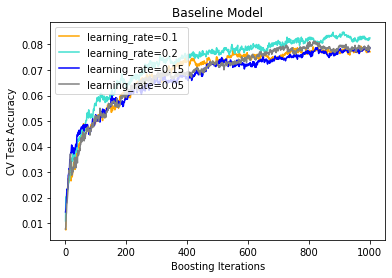

In [17]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, make_scorer
from statistics import mean
import time


plt.figure()
original_params = {'n_estimators': 1000, 'max_features': 1, 'max_depth': 1,
                   'learning_rate': 0.1}
for label, color, setting in [('learning_rate=0.1','orange',
                               {'learning_rate':0.1}),
                              ('learning_rate=0.2','turquoise',
                               {'learning_rate':0.2}),
                              ('learning_rate=0.15','blue',
                               {'learning_rate':0.15}),
                              ('learning_rate=0.05','gray',
                               {'learning_rate':0.1})]: 
    start_time = time.time()
    skf = StratifiedKFold(n_splits = 5, random_state = 666)
    params = dict(original_params)
    base_score = np.zeros((5,params['n_estimators']), dtype=np.float64)                              
    params.update(setting)
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(train_features, train_labels)

    for i, Y_pred in enumerate(clf.staged_predict(test_features)):
        base_score[j,i] = accuracy_score(test_labels, Y_pred)
        
    score = [mean(base_score[:,i]) for i in range(1000)]
    plt.plot(range(1, 1001), score, color=color, label=label)
    print("###### Time: %f" % (time.time() - start_time) + "s ######")

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('CV Test Accuracy')
plt.title('Baseline Model')
plt.show()

###### Time: 17.539341s ######
###### Time: 17.793764s ######
###### Time: 16.071964s ######
###### Time: 16.390145s ######
###### Time: 17.009236s ######


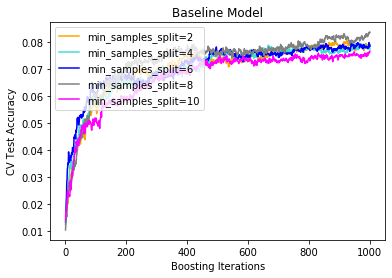

In [18]:
import matplotlib.pyplot as plt
plt.figure()
original_params = {'n_estimators': 1000, 'max_features': 1, 'max_depth': 1,
                   'learning_rate': 0.1}
original_params.update({'learning_rate':0.2})
for label, color, setting in [('min_samples_split=2','orange',
                               {'min_samples_split':2}),
                              ('min_samples_split=4','turquoise',
                               {'min_samples_split':4}),
                              ('min_samples_split=6','blue',
                               {'min_samples_split':6}),
                              ('min_samples_split=8','gray',
                               {'min_samples_split':8}),
                             ('min_samples_split=10','magenta',
                               {'min_samples_split':10})]: 
    start_time = time.time()
    skf = StratifiedKFold(n_splits = 5, random_state = 666)
    params = dict(original_params)
    base_score = np.zeros((5,params['n_estimators']), dtype=np.float64)                              
    params.update(setting)
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(train_features, train_labels)

    for i, Y_pred in enumerate(clf.staged_predict(test_features)):
        base_score[j,i] = accuracy_score(test_labels, Y_pred)
        
    score = [mean(base_score[:,i]) for i in range(1000)]
    plt.plot(range(1, 1001), score, color=color, label=label)
    print("###### Time: %f" % (time.time() - start_time) + "s ######")
plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('CV Test Accuracy')
plt.title('Baseline Model')
plt.show()

In [ ]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.1,n_estimators=100), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(train_features, Y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

In [24]:
para2 = {
    'max_depth': [1,2,3]
}
model2 =GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)
gsearch2 = GridSearchCV(estimator = model2, 
                        param_grid = para2, 
                        scoring ='accuracy',
                        cv = 5,
                        n_jobs = 4
                       )
gsearch2.fit(train_features, Y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

C:\Users\ariaa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [25]:
gsearch2.best_params_

{'max_depth': 2}

In [27]:
gsearch2.best_score_

0.416

In [23]:
#test svc...
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
#把要调整的参数以及其候选值 列出来；
param_grid = {"gamma":[0.001,0.01,0.1,1,10,100],
             "C":[0.001,0.01,0.1,1,10,100]}
print("Parameters:{}".format(param_grid))

grid_search = GridSearchCV(SVC(),param_grid,cv=5) #实例化一个GridSearchCV类

grid_search.fit(train_features, Y_train) #训练，找到最优的参数，同时使用最优的参数实例化一个新的SVC estimator。
print("Test set score:{:.2f}".format(grid_search.score(test_features, Y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best score on train set:{:.2f}".format(grid_search.best_score_))

Parameters:{'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Test set score:0.03
Best parameters:{'C': 0.001, 'gamma': 0.001}
Best score on train set:0.06


In [ ]:
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

In [ ]:
param_test ={'n_estimators':range(80,200,10),'learning_rate':[i/100 for i in range(1,25,2)]}
gb=GradientBoostingClassifier(random_state=10)
gsearch1= GridSearchCV(estimator = gb,param_grid =param_test,scoring='f1',n_jobs=4,cv=3)  
gsearch1.fit(X_train, y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_ 

In [ ]:
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
model = GradientBoostingClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(train_features,Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost learning_rate vs Log Loss")
pyplot.xlabel('learning_rate')
pyplot.ylabel('Log Loss')
pyplot.savefig('learning_rate.png')

In [35]:
train_pred

array([19, 10,  8, ..., 10, 12,  8], dtype=int64)

In [34]:
train_labels

2102    19
1094    10
888      8
423      4
1808    16
        ..
1638    15
1095    10
1130    10
1294    12
860      8
Name: emotion_idx, Length: 1875, dtype: int64

In [33]:
Y_pred

array([ 6,  5, 11, 21, 21,  6, 20, 22,  5, 21, 11, 22,  8, 13, 16,  8, 12,
        5,  4, 10, 21,  1, 15, 22,  2,  8,  6, 16, 20,  5, 13,  9, 11, 15,
        9, 13, 17, 11, 19, 16, 21, 13,  5, 12, 14, 15, 11,  2, 17, 20, 13,
       16,  7,  1, 16,  8,  1, 22, 18, 12, 14, 21, 22, 14,  9, 11, 11,  2,
        5,  4,  5, 14, 12, 11, 14, 22,  6,  2, 14, 22, 15, 13, 20,  3, 13,
        5, 18,  1, 17, 18,  8, 14,  2, 17, 17, 10, 11,  7,  6,  2, 21, 22,
       20, 16, 17,  6,  4,  2, 12, 12,  6, 16,  6,  1,  5, 17, 21, 14, 17,
       17,  3,  7,  1, 21, 16, 12,  8, 22, 13,  3, 16, 14, 19, 14, 10, 11,
       11,  6,  9, 18, 17, 11, 13,  6, 10, 10,  6,  3, 16, 17, 13, 11, 15,
        8, 21,  7, 16, 14, 22, 18, 12, 17,  4, 12,  1, 21,  8, 22, 21,  7,
        7,  8,  5, 13,  9, 18,  8,  5, 21,  4, 14, 21, 11, 14,  5, 13, 12,
        6,  5, 13, 22, 20,  7, 12, 11, 12,  6, 15, 17, 22, 13, 10, 20,  3,
        8, 14, 11,  3, 19,  2, 21,  3, 19, 20, 14,  3,  5, 20, 15,  5, 16,
       22, 18, 20, 22, 19

In [32]:
test_labels

1447    13
1114    10
1064    10
2287    21
1537    14
        ..
767      7
2003    18
1726    16
1888    17
286      3
Name: emotion_idx, Length: 625, dtype: int64